In [5]:
from __future__ import division, print_function

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import pandas as pd
import datetime
import glob

import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

25
['\x88', '\xa7', '\xa5', '\xaa', '\xc1', '\x7f', '', '', '@', 'P', '\x98']
2003
0
/home/mgrenier/Documents/Data_Arctic/CTDBeaufortGyreWHOI/LSSL_ctd2003/1db_down
47
47
(47,)
(47, 5000)
2004
50
50
(50,)
(50, 5000)


NameError: name 'indexSig' is not defined

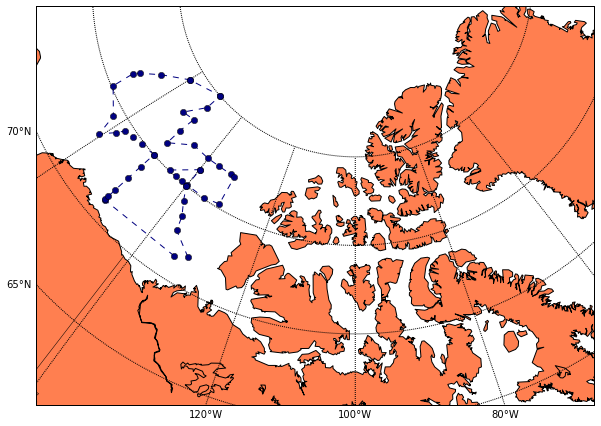

In [6]:
### Draw the map for the location of the stations

#m = Basemap(llcrnrlon=-170, llcrnrlat=65, urcrnrlon=-50, urcrnrlat=85,lon_0=-100, resolution='l',area_thresh=10,projection='merc')
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
x=100000
m = Basemap(llcrnrx=-20*x, llcrnry=-10*x, urcrnrx=+15*x, urcrnry=+15*x,lon_0=-100, lat_0=75,projection='ortho',resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral')

m.drawmeridians(np.arange(-160,-50,20), labels=[0,0,0,1])
m.drawparallels(np.arange(65,85,5), labels=[1,0,0,0])

cmap = plt.get_cmap('jet')


### Read the CNV files and extract the variables of interest

#DIRECTORY = globals()['/home/mgrenier/Documents/Data_Arctic/CTDBeaufortGyreWHOI/LSSL_ctd' % i] 
DIRECTORY0 = '/home/mgrenier/Documents/Data_Arctic/CTDBeaufortGyreWHOI/'
DIRECTORY = [DIRECTORY for DIRECTORY in os.listdir(DIRECTORY0) if DIRECTORY.startswith('LSSL')]
DIRECTORY.sort()
#print(DIRECTORY0,DIRECTORY[0])
    ### Range of years over which data were collected
i_init=2003
i_final=2013
coef=int(255/(i_final-i_init))
print(coef)

legend=list(np.chararray((i_final-i_init+1)))

press=list(np.chararray((i_final-i_init+1)))
temp=list(np.chararray((i_final-i_init+1)))
sal=list(np.chararray((i_final-i_init+1)))
potemp=list(np.chararray((i_final-i_init+1)))
dens=list(np.chararray((i_final-i_init+1)))

DIR=list(np.chararray((i_final-i_init+1)))

print(legend)

for i in xrange(i_init,i_final+1,1):
    globals()['l%s' %i]='a'
    legend[i-i_init]=globals()['l%s' %i]

    press[i-i_init]='press'+str(i)
    temp[i-i_init]='temp'+str(i)
    sal[i-i_init]='sal'+str(i)
    dens[i-i_init]='dens'+str(i)
    potemp[i-i_init]='potemp'+str(i)
    
    DIR[i-i_init]='DIR'+str(i)

#print(legend)

   
for i in xrange(i_init,i_final+1,1):
    ind=0
    print(i)
    DIR[i-i_init] = os.path.join(DIRECTORY0,DIRECTORY[i-i_init])

    QUANTITIES = {
        'prDM': press[i-i_init], # pressure
        't090C': temp[i-i_init], # temperature
        'sal00': sal[i-i_init], # salinity
        'potemp090C': potemp[i-i_init], # potential temperature
        'sigma-é00': dens[i-i_init], # sigma theta
    }
    
    QUANTITIES2 = {
        'Pressure,': press[i-i_init], # pressure
        'Temperature,': temp[i-i_init], # temperature
        'Salinity,': sal[i-i_init], # salinity
    }


    filenames = [f for f in os.listdir(DIR[i-i_init]) if (f.endswith('.cnv') or f.endswith('.ctd'))]
    filenames.sort()
    print(len(filenames))
    ### If files are in subdirectories (e.g.: 1db_down because 1db_up is also available)
    if len(filenames) == 0:
        DIRECTORY1 = [DIRECTORY1 for DIRECTORY1 in os.listdir(DIR[i-i_init]) if DIRECTORY1.endswith('down')]
        #print(globals()['DIRECTORY%s' %i],DIRECTORY1[0])
        DIR[i-i_init] = os.path.join(DIR[i-i_init],DIRECTORY1[0])
        print(DIR[i-i_init])
        filenames = [f for f in os.listdir(DIR[i-i_init]) if (f.endswith('.cnv') or f.endswith('.ctd'))]
        print(len(filenames))
    
    l=len(filenames)
    print(l)
    
    globals()['latitude%s' %i]=np.zeros(l)
    globals()['longitude%s' %i]=np.zeros(l)
    globals()['time%s' %i]=np.zeros(l)
    globals()['p%s' %i]=np.empty((l,5000))
    globals()['T%s' %i]=np.empty((l,5000))
    globals()['S%s' %i]=np.empty((l,5000))
    globals()['theta%s' %i]=np.empty((l,5000))
    globals()['dens%s' %i]=np.empty((l,5000))
    globals()['p%s' %i][:]=np.NAN    
    globals()['T%s' %i][:]=np.NAN
    globals()['S%s' %i][:]=np.NAN    
    globals()['theta%s' %i][:]=np.NAN
    globals()['dens%s' %i][:]=np.NAN
    print(globals()['latitude%s' %i].shape)
    print(globals()['S%s' %i].shape)

    for filename in sorted(filenames):
        f = open(os.path.join(DIR[i-i_init], filename), 'rt')
        j=-1
        ind=ind+1
        #print(f.shape[0][1][2)
        for line in f:
            line = line.strip()
            word = line.split()
            #print(line.split(',')[0])
            #print(word[0])
            #print(line[:])

            if (line.startswith('*') or word[0].startswith('L') or word[0].startswith('D')): #'*' for .cnv files; 'L' or 'D' 
#for .ctd files
                # header line, look for useful info
                if 'Latitude' in line:
                    #print(word[2])#,word[4],word[5])
                    if word[2] == 'Latitude':
                        globals()['latitude%s' %i][ind-1]= float(word[4])+ float(word[5])/60
                        #print(globals()['latitude%s' %i].shape)
                        #print(globals()['latitude%s' %i][0])
                    else:
                        globals()['latitude%s' %i][ind-1]= float(word[2])+ float(word[3])/60
                if 'LATITUDE' in line:
                    #print(word[2])
                    globals()['latitude%s' %i][ind-1]= float(word[2])
                if 'Longitude' in line:
                    #print(word[2],word[4],word[5])
                    if word[2] == 'Longitude':
                        globals()['longitude%s' %i][ind-1] = -(float(word[4])+ float(word[5])/60)                   
                    else:
                        globals()['longitude%s' %i][ind-1]= -float(word[2])+ float(word[3])/60
                if 'LONGITUDE' in line:
                    #print(word[2])
                    globals()['longitude%s' %i][ind-1]= -float(word[2])
                if '(Time)' in line:
                    #print(word[3])#,word[6],word[7],word[8])
                    if word[3] == '(Time)':
                        string = word[7] + ' ' + word[5] + ' ' + word[6] # Date only
                        #string = word[7] + ' ' + word[5] + ' ' + word[6] + ' ' + word[8] # Date & time
                        #print(string)
                        globals()['time%s' %i] = datetime.datetime.strptime(str(string),'%Y %b %d') # Date only
                        #globals()['time%s' %i] = datetime.datetime.strptime(str(string),'%Y %b %d %H:%M:%S') # Date & time
                        #print(globals()['time%s' %i])
                    else:
                        string = word[5] + ' ' + word[3] + ' ' + word[4]
                        globals()['time%s' %i] = datetime.datetime.strptime(str(string),'%Y %b %d') # Date only
                if 'DATE' in line:
                    #print(word[2])
                    string = word[2]
                    globals()['time%s' %i] = datetime.datetime.strptime(str(string),'%d-%b-%Y')
                    globals()['time%s' %i].strftime('%Y %b %d')
                if '** Station' in line:
                    station = line.partition(': ')[2]
                #if line == '*END*':
                 #   break
            elif line.startswith('# name'):     
                # comment line, look for plotable quantities information
                #print(QUANTITIES.items())
                #print(line.partition(': ')[2])
                #print(int(line.split(' ')[2]))
                if 'prDM' in line:
                    indexp = int(line.split(' ')[2])
                if 't090C' in line:
                    indexT = int(line.split(' ')[2])
                if 'sal00' in line:
                    indexS = int(line.split(' ')[2])
                if 'potemp090C' in line:
                    indexTheta = int(line.split(' ')[2])
                if 'sigma-é00' in line:
                    indexSig = int(line.split(' ')[2])
                    #print(indexS)
                
                
            elif (line.startswith('1') or line.startswith('2') or line.startswith('3') 
                  or line.startswith('4') or line.startswith('5') or line.startswith('6') or 
                  line.startswith('7') or line.startswith('8') or line.startswith('9')) and ',' in line: ### ctd files 
                    j=j+1
                    #print(line.split(',')[2])
                    globals()['p%s' %i][ind-1,j]= line.split(',')[0]
                    globals()['T%s' %i][ind-1,j]= line.split(',')[1]
                    globals()['S%s' %i][ind-1,j]= line.split(',')[2]

            elif (line.startswith('1') or line.startswith('2') or line.startswith('3') 
                  or line.startswith('4') or line.startswith('5') or line.startswith('6') or 
                  line.startswith('7') or line.startswith('8') or line.startswith('9')) and ',' not in line: ### CNV files
                    j=j+1                    
                    globals()['p%s' %i][ind-1,j]= word[indexp]
                    globals()['T%s' %i][ind-1,j]= word[indexT]
                    globals()['S%s' %i][ind-1,j]= word[indexS]
                    if float(word[indexSig]) < 15.0: ### mistake in files from 2004: inversion of density column and pot temp column 
                        #print("Inversion Theta/Sig!!!")
                        globals()['theta%s' %i][ind-1,j]= word[indexSig]
                        globals()['dens%s' %i][ind-1,j]= word[indexTheta]
                    else:
                        globals()['theta%s' %i][ind-1,j]= word[indexTheta]
                        globals()['dens%s' %i][ind-1,j]= word[indexSig]    
                    #print(globals()['dens%s' %i][ind-1,j])
                    
    #print(globals()['longitude%s' %i][2],globals()['time%s' %i])
    #print(globals()['S%s' %i][0,:],globals()['S%s' %i][1,:])
    #print(globals()['S%s' %i][0,:],globals()['S%s' %i][1,:])

    xs,ys= m(globals()['longitude%s' %i],globals()['latitude%s' %i])
    plt.plot(xs,ys,'o--',color=cmap((i-2003)*coef),label=i)
    globals()['l%s' % i] = mlines.Line2D([], [],linestyle='--',marker='o',color=cmap((i-2003)*coef),markersize=5, label=i)
    legend[i-i_init]=globals()['l%s' % i]
    #print(legend)
lgd=plt.legend(handles=legend,loc=1)
frame = lgd.get_frame()
frame.set_facecolor('1.0')

plt.show()


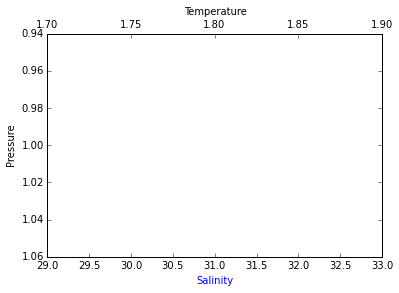

In [3]:
#for i in xrange(i_init,i_final,1)    
ax1 = plt.axes()#[0.08,0.1,0.25,0.4])
ax1.invert_yaxis()

ax1.plot(S2004,p2004,'b')    
ax1.set_xlabel('Salinity')
ax1.xaxis.label.set_color('blue')
ax1.set_ylabel('Pressure')
ax2 = ax1.twiny()
ax2.plot(T2004,p2004,'r')
ax2.set_xlabel('Temperature')
    
plt.show()

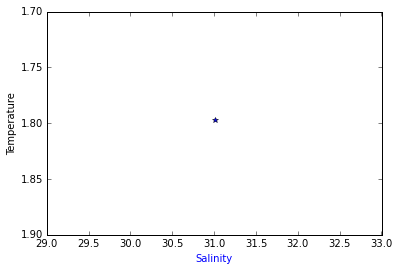

In [4]:
    ax1 = plt.axes()
    ax1.invert_yaxis()

    ax1.plot(S2004,T2004,'b*')    
    ax1.set_xlabel('Salinity')
    ax1.xaxis.label.set_color('blue')
    ax1.set_ylabel('Temperature')
    
plt.show()